In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import time
import matplotlib.pyplot as plt

os.chdir('../')
RedditResult_path=os.path.join('Processed','Reddit')
kaggleResult_path = os.path.join('Processed','Kaggle50')
ResultDump='FinalResults'

In [2]:
resultList=[]
for root, subdir, files in os.walk(ResultDump):
    for file in files:
        if file.endswith('.csv'):
            print(file)

FullRawResult_Kaggle-Filtered.csv
FullRawResult_Kaggle.csv
FullRawResult_Reddit.csv


### Load Reddit results csv

In [7]:
reddit_resultDF=pd.read_csv(os.path.join(ResultDump,'FullRawResult_Reddit.csv'), index_col=0)
print(reddit_resultDF.shape)
reddit_resultDF.head()

(600, 10)


,file,cv_split#,class,Feature,model,CM,Acc,f1-macro,auc,time-s
25,reddit_noNNnoSW,1,JP,LIWC,cnb,[[584 468]\n [335 423]],0.556354,0.552815,0.563098,0.018949
26,reddit_noNNnoSW,1,JP,LIWC,rf,[[908 144]\n [602 156]],0.587845,0.501859,0.576471,1.004852
27,reddit_noNNnoSW,1,JP,LIWC,lgr,[[630 422]\n [338 420]],0.580110,0.574381,0.601676,0.163528
28,reddit_noNNnoSW,1,JP,LIWC,svc,[[635 417]\n [356 402]],0.572928,0.565732,0.595710,28.424195
29,reddit_noNNnoSW,1,JP,LIWC,lgb,[[644 408]\n [370 388]],0.570166,0.561392,0.582608,2.733895


In [9]:
reddit_resultDF_mean=reddit_resultDF.groupby(['file','Feature','model','class']).mean()[['Acc','f1-macro','auc','time-s']].rename({'Acc':'acc_mean','f1-macro':'f1-macro_mean','auc':'auc_mean','time-s':'time-s_mean'}, axis='columns')
reddit_resultDF_mean.head()

acc_mean  f1-macro_mean  auc_mean  time-s_mean
file   Feature model class                                                
reddit LIWC    cnb   JP     0.569976       0.563278  0.591487     0.017752
               lgb   JP     0.565997       0.558822  0.587726     2.162514
               lgr   JP     0.584568       0.579268  0.610939     0.139824
               rf    JP     0.588436       0.512234  0.577964     1.047370
               svc   JP     0.584788       0.574178  0.604348    30.156803

In [10]:
#Write grouped result to csv
reddit_resultDF_mean.to_csv(os.path.join(ResultDump,'CVmean_Reddit.csv'))

### Load Kaggle results csv

In [12]:
kaggle_resultDF=pd.read_csv(os.path.join(ResultDump,'FullRawResult_Kaggle.csv'), index_col=0)
print(kaggle_resultDF.shape)
kaggle_resultDF.head()

(600, 10)


,file,cv_split#,class,Feature,model,CM,Acc,f1-macro,auc,time-s
25,kaggle_noNNnoSW,1,JP,LIWC,cnb,[[576 468]\n [283 401]],0.565394,0.560890,0.590208,0.015957
26,kaggle_noNNnoSW,1,JP,LIWC,rf,[[960 84]\n [618 66]],0.593750,0.445269,0.566366,0.793226
27,kaggle_noNNnoSW,1,JP,LIWC,lgr,[[616 428]\n [303 381]],0.576968,0.568996,0.587091,0.113658
28,kaggle_noNNnoSW,1,JP,LIWC,svc,[[579 465]\n [301 383]],0.556713,0.550936,0.592603,26.034310
29,kaggle_noNNnoSW,1,JP,LIWC,lgb,[[656 388]\n [326 358]],0.586806,0.574140,0.598265,3.907142


In [14]:
kaggle_resultDF_mean=kaggle_resultDF.groupby(['file','Feature','model','class']).mean()[['Acc','f1-macro','auc','time-s']].rename({'Acc':'acc_sd','f1-macro':'f1-macro_sd','auc':'auc_sd','time-s':'time-s_sd'}, axis='columns')
kaggle_resultDF_mean.head()

acc_sd  f1-macro_sd    auc_sd  time-s_sd
file   Feature model class                                            
kaggle LIWC    cnb   JP     0.566168     0.559447  0.597337   0.016755
               lgb   JP     0.578326     0.568682  0.594222   2.664864
               lgr   JP     0.578556     0.571201  0.612797   0.133836
               rf    JP     0.604145     0.460613  0.583581   0.913367
               svc   JP     0.579135     0.571953  0.611846  23.559602

In [15]:
#Write grouped result to csv
kaggle_resultDF_mean.to_csv(os.path.join(ResultDump,'CVmean_Kaggle.csv'))

### Load Kaggle-Filtered results csv

In [22]:
kaggle_Filtered_resultDF=pd.read_csv(os.path.join(ResultDump,'FullRawResult_Kaggle-Filtered.csv'), index_col=0)
print(kaggle_Filtered_resultDF.shape)
kaggle_Filtered_resultDF.head()

(600, 10)


,file,cv_split#,class,Feature,model,CM,Acc,f1-macro,auc,time-s
25,kaggle_noNNnoSW,1,JP,LIWC,cnb,[[576 468]\n [283 401]],0.565394,0.560890,0.590208,0.015957
26,kaggle_noNNnoSW,1,JP,LIWC,rf,[[960 84]\n [618 66]],0.593750,0.445269,0.566366,0.793226
27,kaggle_noNNnoSW,1,JP,LIWC,lgr,[[616 428]\n [303 381]],0.576968,0.568996,0.587091,0.113658
28,kaggle_noNNnoSW,1,JP,LIWC,svc,[[579 465]\n [301 383]],0.556713,0.550936,0.592603,26.034310
29,kaggle_noNNnoSW,1,JP,LIWC,lgb,[[656 388]\n [326 358]],0.586806,0.574140,0.598265,3.907142


In [23]:
kaggle_Filtered_resultDF_mean=kaggle_Filtered_resultDF.groupby(['file','Feature','model','class']).mean()[['Acc','f1-macro','auc','time-s']].rename({'Acc':'acc_sd','f1-macro':'f1-macro_sd','auc':'auc_sd','time-s':'time-s_sd'}, axis='columns')
kaggle_Filtered_resultDF_mean.head()

acc_sd  f1-macro_sd    auc_sd  time-s_sd
file   Feature model class                                            
kaggle LIWC    cnb   JP     0.566168     0.559447  0.597337   0.016755
               lgb   JP     0.578326     0.568682  0.594222   2.664864
               lgr   JP     0.578556     0.571201  0.612797   0.133836
               rf    JP     0.604145     0.460613  0.583581   0.913367
               svc   JP     0.579135     0.571953  0.611846  23.559602

In [24]:
#Write grouped result to csv
kaggle_Filtered_resultDF_mean.to_csv(os.path.join(ResultDump,'CVmean_Kaggle-Filtered.csv'))

### Visualize effect of stop words on classifiers
If text containing MBTI type keywords are not removed, the model perform much better, however that does not realistic. 
It is absolutely needed to censor these keywords in order to train a model that can generalize over normal social media postings. The dataset is obtained from a MBTI personality forum and is highly bias towards personality discussion.

In [31]:
#Select data to visualize
dataDF=reddit_resultDF

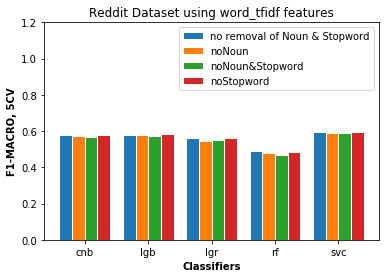

In [32]:
# View mean performance of feature and model accross all files
# dataDF=kaggle_resultDF.groupby(['file','Feature','model']).mean().reset_index()
dataDF=dataDF.groupby(['file','class','Feature','model']).mean().reset_index()
model='lgb'
feature='word_tfidf'
metric='f1-macro'
modelindex=dataDF['model']==model
featureindex=dataDF['Feature']==feature
result_Gfile=dataDF[featureindex].groupby(['file','model']).mean()

barWidth=0.2
x_sequence = ['cnb','lgb', 'lgr','rf','svc']

x1=(np.arange(5)-0.1)
x2=[x+barWidth for x in x1]
x3=[x+barWidth for x in x2]
x4=[x+barWidth for x in x3]

bar1=[]
bar2=[]
bar3=[]
bar4=[]

for x in x_sequence:
    for name, data in result_Gfile.iterrows():
        if name[1]==x:
            if name[0].endswith('noNN'):
                bar2.append(data[metric])
            elif name[0].endswith('noNNnoSW'):
                bar3.append(data[metric])
            elif name[0].endswith('noSW'):
                bar4.append(data[metric])
            else:
                bar1.append(data[metric])
                    
# Make the plot
plt.bar(x1, bar1,width=barWidth, edgecolor='white', label='no removal of Noun & Stopword')
plt.bar(x2, bar2, width=barWidth, edgecolor='white', label='noNoun')
plt.bar(x3, bar3, width=barWidth, edgecolor='white', label='noNoun&Stopword')
plt.bar(x4, bar4, width=barWidth, edgecolor='white', label='noStopword')

#Draw a line 
# plt.plot((np.arange(1)+0.2),np.mean(list(zip(bar1,bar2,bar3,bar4)),axis=1))

# Add xticks on the middle of the group bars
plt.xlabel('Classifiers', fontweight='bold')
plt.ylabel(f'{metric.upper()}, 5CV', fontweight='bold')
plt.xticks([x + barWidth for x in range(5)], x_sequence)
plt.ylim(0.0,1.2)
plt.title(f"Reddit Dataset using {feature} features")

# Create legend & Show graphic
plt.legend(loc=1)

plt.savefig(os.path.join(ResultDump,'VisCLF-POS_Kaggle-F.png'),format='png')
plt.show()